In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data=pd.read_csv('shopping_trends_updated (2).csv')
data

,Customer ID,Age,Gender,Purchase Amount (USD),Review Rating,Subscription Status,Previous Purchases,Frequency of Purchases
0,1,55,Male,53,3.1,Yes,14,Fortnightly
1,2,19,Male,64,3.1,Yes,2,Fortnightly
2,3,50,Male,73,3.1,Yes,23,Weekly
3,4,21,Male,90,3.5,Yes,49,Weekly
4,5,45,Male,49,2.7,Yes,31,Annually
...,...,...,...,...,...,...,...,...
3895,3896,40,Female,28,4.2,No,32,Weekly
3896,3897,52,Female,49,4.5,No,41,Bi-Weekly
3897,3898,46,Female,33,2.9,No,24,Quarterly
3898,3899,44,Female,77,3.8,No,24,Weekly


In [3]:
data.isna().sum()

Customer ID               0
Age                       0
Gender                    0
Purchase Amount (USD)     0
Review Rating             0
Subscription Status       0
Previous Purchases        0
Frequency of Purchases    0
dtype: int64

In [4]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Gender']=le.fit_transform(data['Gender'])
data['Subscription Status']=le.fit_transform(data['Subscription Status'])
data['Frequency of Purchases']=le.fit_transform(data['Frequency of Purchases'])
data.head()

,Customer ID,Age,Gender,Purchase Amount (USD),Review Rating,Subscription Status,Previous Purchases,Frequency of Purchases
0,1,55,1,53,3.1,1,14,3
1,2,19,1,64,3.1,1,2,3
2,3,50,1,73,3.1,1,23,6
3,4,21,1,90,3.5,1,49,6
4,5,45,1,49,2.7,1,31,0


In [5]:
x=data.iloc[:,:-1]
x.head()

,Customer ID,Age,Gender,Purchase Amount (USD),Review Rating,Subscription Status,Previous Purchases
0,1,55,1,53,3.1,1,14
1,2,19,1,64,3.1,1,2
2,3,50,1,73,3.1,1,23
3,4,21,1,90,3.5,1,49
4,5,45,1,49,2.7,1,31


In [6]:
y=data.iloc[:,-1:]
y.head()

,Frequency of Purchases
0,3
1,3
2,6
3,6
4,0


array([[<Axes: title={'center': 'Customer ID'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Gender'}>],
       [<Axes: title={'center': 'Purchase Amount (USD)'}>,
        <Axes: title={'center': 'Review Rating'}>,
        <Axes: title={'center': 'Subscription Status'}>],
       [<Axes: title={'center': 'Previous Purchases'}>,
        <Axes: title={'center': 'Frequency of Purchases'}>, <Axes: >]],
      dtype=object)

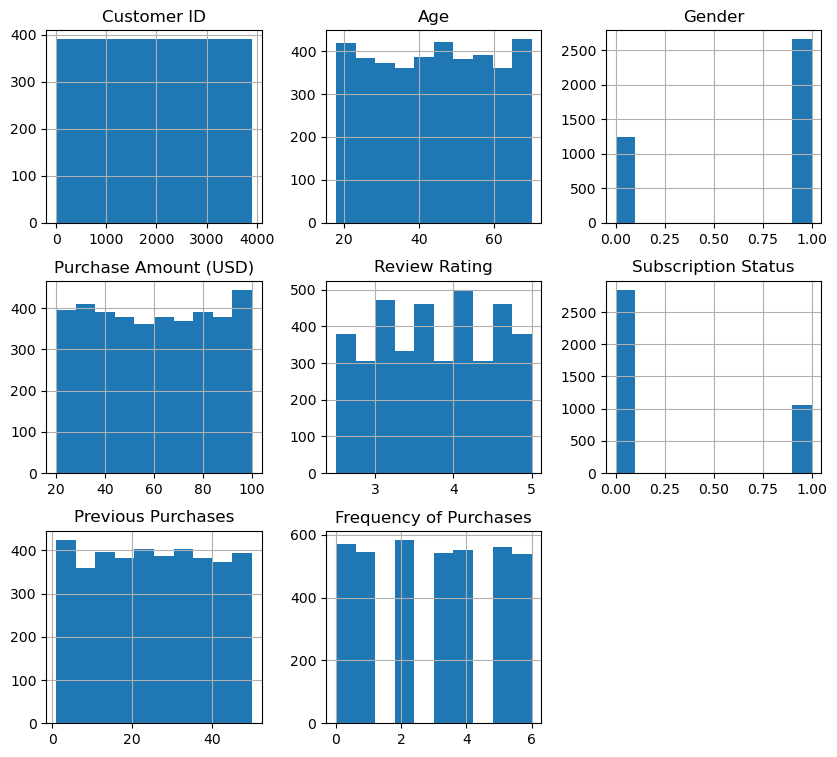

In [7]:
data.hist(figsize=(10,9))

In [8]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.25,random_state=2)
print('****************Training Data Shape********************\n')
print('Training data-X- Shape:\t',xtrain.shape)
print()
print('Training data-y- Shape:\t',ytrain.shape)
print()
print('****************Testing Data Shape********************\n')
print('Testing data(x-Input) Shape:\t',xtest.shape)
print()
print('Testing data(y-Outcome) Shape:\t',ytest.shape)

****************Training Data Shape********************

Training data-X- Shape:	 (2925, 7)

Training data-y- Shape:	 (2925, 1)

****************Testing Data Shape********************

Testing data(x-Input) Shape:	 (975, 7)

Testing data(y-Outcome) Shape:	 (975, 1)


In [11]:
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier(criterion="gini")
print('*'*100)
print('Decison Tree Model')
print('*'*100)
print('\n Training Phase')
dt_clf.fit(xtrain,ytrain)
print('Hyperparameter:\n',dt_clf.get_params())
print('Training Completed')
print('='*100)
print('\n Test Phase')
ypred=dt_clf.predict(xtest)
print('Predicted class labels for the test samples:\n',ypred)
print()
print('Testing completed')

print('='*100)

****************************************************************************************************
Decison Tree Model
****************************************************************************************************

 Training Phase
Hyperparameter:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}
Training Completed

 Test Phase
Predicted class labels for the test samples:
 [2 1 6 0 5 4 6 1 3 5 1 2 2 2 5 2 2 5 2 0 2 0 5 5 2 5 6 3 5 4 5 2 5 3 1 4 3
 6 1 6 5 5 2 1 0 6 2 2 6 0 4 0 4 2 6 4 3 3 3 1 1 1 1 1 5 1 5 6 2 6 6 6 1 6
 5 3 6 2 1 5 0 6 6 0 6 3 0 0 2 6 3 5 1 6 4 0 3 3 5 0 0 2 0 0 3 3 2 6 3 5 2
 1 4 1 3 0 5 0 3 5 4 5 6 2 6 4 2 2 1 4 4 1 3 4 2 4 2 4 1 4 1 3 6 5 2 1 3 1
 4 4 3 3 1 6 4 6 4 6 2 1 6 0 6 4 1 6 4 3 2 0 4 0 2 3 3 3 1 5 2 5 0 1 4 3 6
 1 2 4 2 5 0 

In [12]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print('*'*100)
print('Decison Tree - Performance Measures')
print('*'*100)
print('Accuracy Score:\t',accuracy_score(ytest,ypred))
print('='*100)
print('Confusion Matric:\n',confusion_matrix(ytest,ypred))
print('='*100)
print('Classification Report\n',classification_report(ytest,ypred))
print('='*100)

****************************************************************************************************
Decison Tree - Performance Measures
****************************************************************************************************
Accuracy Score:	 0.13743589743589743
Confusion Matric:
 [[18 20 29 21 25 17 11]
 [23 17 15 19 15 29 19]
 [25 17 19 23 15 26 24]
 [18 19 28 23 25 16 24]
 [21 22 21  5 21 18 13]
 [21 20 19 14 17 18 18]
 [20 27 19 24 20 19 18]]
Classification Report
               precision    recall  f1-score   support

           0       0.12      0.13      0.13       141
           1       0.12      0.12      0.12       137
           2       0.13      0.13      0.13       149
           3       0.18      0.15      0.16       153
           4       0.15      0.17      0.16       121
           5       0.13      0.14      0.13       127
           6       0.14      0.12      0.13       147

    accuracy                           0.14       975
   macro avg       0.14   

In [13]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
print('Mean Squared Error: \t', mean_squared_error(ytest, ypred))
print()
print('RMSE: \t', np.sqrt(mean_squared_error(ytest, ypred)))
print()
print('Variance Score:\t', explained_variance_score (ytest,ypred))


print()
print('R-Square: \t', r2_score (ytest, ypred))

Mean Squared Error: 	 8.14051282051282

RMSE: 	 2.853158393870347

Variance Score:	 -1.0258973855439035

R-Square: 	 -1.0262558422685673


[Text(0.4916230547644567, 0.9827586206896551, 'X[6] <= 21.5\ngini = 0.857\nsamples = 2925\nvalue = [431, 410, 435, 389, 432, 436, 392]'),
 Text(0.12964353958877115, 0.9482758620689655, 'X[0] <= 224.0\ngini = 0.856\nsamples = 1236\nvalue = [189, 177, 213, 155, 177, 154, 171]'),
 Text(0.014378938314541612, 0.9137931034482759, 'X[3] <= 83.5\ngini = 0.825\nsamples = 63\nvalue = [12, 1, 7, 13, 6, 10, 14]'),
 Text(0.005422486490529347, 0.8793103448275862, 'X[1] <= 26.5\ngini = 0.798\nsamples = 45\nvalue = [5, 0, 3, 11, 6, 7, 13]'),
 Text(0.002393373347543988, 0.8448275862068966, 'X[3] <= 28.5\ngini = 0.571\nsamples = 7\nvalue = [2, 0, 0, 4, 0, 0, 1]'),
 Text(0.001196686673771994, 0.8103448275862069, 'X[4] <= 3.25\ngini = 0.5\nsamples = 2\nvalue = [1, 0, 0, 0, 0, 0, 1]'),
 Text(0.000598343336885997, 0.7758620689655172, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 0, 0, 0, 1]'),
 Text(0.0017950300106579907, 0.7758620689655172, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0, 0, 0, 0, 0]'),
 Text(0.0

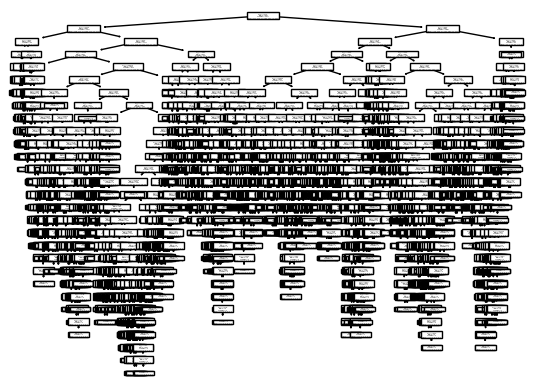

In [14]:
from sklearn import tree
tree.plot_tree(dt_clf)

[Text(0.4916230547644567, 0.9827586206896551, 'X[6] <= 21.5\ngini = 0.857\nsamples = 2925\nvalue = [431, 410, 435, 389, 432, 436, 392]'),
 Text(0.12964353958877115, 0.9482758620689655, 'X[0] <= 224.0\ngini = 0.856\nsamples = 1236\nvalue = [189, 177, 213, 155, 177, 154, 171]'),
 Text(0.014378938314541612, 0.9137931034482759, 'X[3] <= 83.5\ngini = 0.825\nsamples = 63\nvalue = [12, 1, 7, 13, 6, 10, 14]'),
 Text(0.005422486490529347, 0.8793103448275862, 'X[1] <= 26.5\ngini = 0.798\nsamples = 45\nvalue = [5, 0, 3, 11, 6, 7, 13]'),
 Text(0.002393373347543988, 0.8448275862068966, 'X[3] <= 28.5\ngini = 0.571\nsamples = 7\nvalue = [2, 0, 0, 4, 0, 0, 1]'),
 Text(0.001196686673771994, 0.8103448275862069, 'X[4] <= 3.25\ngini = 0.5\nsamples = 2\nvalue = [1, 0, 0, 0, 0, 0, 1]'),
 Text(0.000598343336885997, 0.7758620689655172, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 0, 0, 0, 1]'),
 Text(0.0017950300106579907, 0.7758620689655172, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0, 0, 0, 0, 0]'),
 Text(0.0

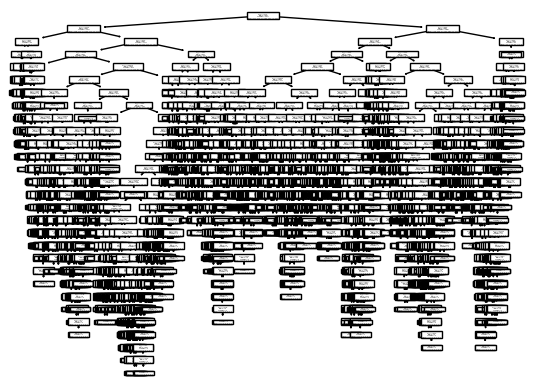

In [15]:
from sklearn.model_selection import GridSearchCV
tree.plot_tree(dt_clf)

In [16]:
dt_clf.feature_names_in_

array(['Customer ID', 'Age', 'Gender', 'Purchase Amount (USD)',
       'Review Rating', 'Subscription Status', 'Previous Purchases'],
      dtype=object)

In [17]:
pruned_tree = DecisionTreeClassifier(ccp_alpha=0.01)  # Adjust the ccp_alpha value
pruned_tree.fit(xtrain, ytrain)
y_pruned = pruned_tree.predict(xtest)
prunedacc = accuracy_score(ytest, y_pruned)
print("Accuracy after pruning:", prunedacc)

Accuracy after pruning: 0.13025641025641024
